In [13]:
import numpy as np
import scipy as sp

import matplotlib as mpl
from matplotlib import pyplot as plt
from adjustText import adjust_text
from statannot import add_stat_annotation

import pandas as pd
import seaborn as sns
import os
%matplotlib inline

In [14]:
def set_aspect_ratio(ax):
    
    """
    helper function to make square axes with equal x and y ranges
    """
    
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    both_min = np.min([xmin, ymin])
    both_max = np.max([xmax, ymax])
    ax.set_xlim((both_min, both_max))
    ax.set_ylim((both_min, both_max))
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    
    return ax
    
def same_ticks(ax):
    
    # Make ticks the same
    ax.set_xticks(ax.get_yticks())
    ax.set_xticklabels([aa.get_text() for aa in ax.get_yticklabels()])
    
    return ax

def draw_id_line(ax, color='gray', linestyle='--'):
    """
    helper function to draw an identity line (where y = x) on a graph
    """
    
    line = mpl.lines.Line2D([0, 1], [0, 1], color=color, linestyle=linestyle)
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)
    
    return ax

In [15]:
data_dir = '/data/HCP_preproc/7T_movie/cpm/results/'

## Plot whole-run results

In [16]:
behav_list = ["cognPC1", "emotPC1"]

clip_list = ["REST1", "MOVIE1", "MOVIE2", "REST4", "MOVIE3", "MOVIE4"]

all_files = os.listdir(data_dir)
files = []
for file in all_files:
    if any(behav in file for behav in behav_list) and any(clip in file for clip in clip_list) and 'trs' not in file and 'NoRegCfds' not in file and 'model' not in file and 'rthr-0.2' in file:
        files.append(file)
        
print(len(files))
print(len(all_files))

864
10081


In [17]:
attributes = ["clip", "behav", "gsr", "zscore", "tail", "metric"]

data = []

for f,file in enumerate(files):
    print("doing file {} of {}".format(f, len(files)))
    r_vals = np.loadtxt(data_dir+file)
    
    meta_data = []
    for attribute in attributes:
        this_attribute = file.split(attribute + '-')[1].split('_')[0].split('.')[0]
        meta_data.append(np.tile(this_attribute, len(r_vals)))
    
    if 'RAND' in file:
        meta_data.append(np.tile(True, len(r_vals)))
    if 'RAND' not in file:
        meta_data.append(np.tile(False, len(r_vals)))
        
    # Do session stuff
    if any(run in file for run in ["REST1", "MOVIE1", "MOVIE2"]):
        meta_data.append(np.tile("1", len(r_vals)))
    if any(run in file for run in ["REST4", "MOVIE3", "MOVIE4"]):
        meta_data.append(np.tile("2", len(r_vals)))
    if any(run in file for run in ["REST2", "REST3"]):
        meta_data.append(np.tile("NaN"), len(r_vals))
        
    meta_data.append(r_vals)
    data.append(list(zip(*meta_data)))

data = [item for sublist in data for item in sublist]
columns = attributes + ['RAND', "session", "r_val"]
df = pd.DataFrame(data=data, columns=columns)

doing file 0 of 864
doing file 1 of 864
doing file 2 of 864
doing file 3 of 864
doing file 4 of 864
doing file 5 of 864
doing file 6 of 864
doing file 7 of 864
doing file 8 of 864
doing file 9 of 864
doing file 10 of 864
doing file 11 of 864
doing file 12 of 864
doing file 13 of 864
doing file 14 of 864
doing file 15 of 864
doing file 16 of 864
doing file 17 of 864
doing file 18 of 864
doing file 19 of 864
doing file 20 of 864
doing file 21 of 864
doing file 22 of 864
doing file 23 of 864
doing file 24 of 864
doing file 25 of 864
doing file 26 of 864
doing file 27 of 864
doing file 28 of 864
doing file 29 of 864
doing file 30 of 864
doing file 31 of 864
doing file 32 of 864
doing file 33 of 864
doing file 34 of 864
doing file 35 of 864
doing file 36 of 864
doing file 37 of 864
doing file 38 of 864
doing file 39 of 864
doing file 40 of 864
doing file 41 of 864
doing file 42 of 864
doing file 43 of 864
doing file 44 of 864
doing file 45 of 864
doing file 46 of 864
doing file 47 of 864
do

doing file 378 of 864
doing file 379 of 864
doing file 380 of 864
doing file 381 of 864
doing file 382 of 864
doing file 383 of 864
doing file 384 of 864
doing file 385 of 864
doing file 386 of 864
doing file 387 of 864
doing file 388 of 864
doing file 389 of 864
doing file 390 of 864
doing file 391 of 864
doing file 392 of 864
doing file 393 of 864
doing file 394 of 864
doing file 395 of 864
doing file 396 of 864
doing file 397 of 864
doing file 398 of 864
doing file 399 of 864
doing file 400 of 864
doing file 401 of 864
doing file 402 of 864
doing file 403 of 864
doing file 404 of 864
doing file 405 of 864
doing file 406 of 864
doing file 407 of 864
doing file 408 of 864
doing file 409 of 864
doing file 410 of 864
doing file 411 of 864
doing file 412 of 864
doing file 413 of 864
doing file 414 of 864
doing file 415 of 864
doing file 416 of 864
doing file 417 of 864
doing file 418 of 864
doing file 419 of 864
doing file 420 of 864
doing file 421 of 864
doing file 422 of 864
doing file

doing file 751 of 864
doing file 752 of 864
doing file 753 of 864
doing file 754 of 864
doing file 755 of 864
doing file 756 of 864
doing file 757 of 864
doing file 758 of 864
doing file 759 of 864
doing file 760 of 864
doing file 761 of 864
doing file 762 of 864
doing file 763 of 864
doing file 764 of 864
doing file 765 of 864
doing file 766 of 864
doing file 767 of 864
doing file 768 of 864
doing file 769 of 864
doing file 770 of 864
doing file 771 of 864
doing file 772 of 864
doing file 773 of 864
doing file 774 of 864
doing file 775 of 864
doing file 776 of 864
doing file 777 of 864
doing file 778 of 864
doing file 779 of 864
doing file 780 of 864
doing file 781 of 864
doing file 782 of 864
doing file 783 of 864
doing file 784 of 864
doing file 785 of 864
doing file 786 of 864
doing file 787 of 864
doing file 788 of 864
doing file 789 of 864
doing file 790 of 864
doing file 791 of 864
doing file 792 of 864
doing file 793 of 864
doing file 794 of 864
doing file 795 of 864
doing file

In [18]:
for col in df.columns:
    print(col, df[col].unique())

clip ['MOVIE1' 'REST1' 'REST4' 'MOVIE2' 'MOVIE3' 'MOVIE4']
behav ['emotPC1' 'cognPC1']
gsr ['0' '1']
zscore ['1' '0']
tail ['pos' 'neg' 'glm']
metric ['r2' 'spearman' 'pearson']
RAND [False  True]
session ['1' '2']
r_val [-0.08390346 -0.15658102 -0.09927213 ... -0.00542751 -0.0486988
 -0.02059366]


In [19]:
my_palette = {"REST1": "tab:gray", 
              "REST2": "tab:gray",
              "REST3": "tab:gray",
              "REST4": "tab:gray",
              "MOVIE1": "tab:purple",
              "MOVIE2": "tab:purple",
              "MOVIE3": "tab:purple",
              "MOVIE4": "tab:purple",
             }

In [23]:
order = ["REST1", "MOVIE1", "MOVIE2"]
box_pairs = [("MOVIE1", "REST1"), ("MOVIE2", "REST1"), ("MOVIE2", "MOVIE1")]
test_short_name = 't-test'
pvalues = []

pair = box_pairs[1]

data1 = df[(df["clip"]==pair[0])
        & (df["metric"]==params["metric"])
            & (df["tail"]==params["tail"])
            & (df["zscore"]==params["zscore"])
            & (df["gsr"]==params["gsr"]) 
            & (df["behav"] ==params["behav"])
            & (df["RAND"] ==False)]["r_val"]
data2 = df[(df["clip"]==pair[1])
        & (df["metric"]==params["metric"])
            & (df["tail"]==params["tail"])
            & (df["zscore"]==params["zscore"])
            & (df["gsr"]==params["gsr"]) 
            & (df["behav"] ==params["behav"])
            & (df["RAND"] ==False)]["r_val"]
u1, p1 = sp.stats.mannwhitneyu(data1,data2, alternative='two-sided')
u2, p2 = sp.stats.mannwhitneyu(data2,data1, alternative='two-sided')
print(u1, p1)
print(u2, p2)

10000.0 2.561999346290125e-34
0.0 2.561999346290125e-34


In [25]:
import pingouin as pg
pg.mwu(data1, data2, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,10000.0,two-sided,2.561999e-34,-1.0,1.0


REST1 : 10000 rand, 100 obs
Median r = 0.10, p = 0.19
MOVIE1 : 9998 rand, 100 obs
Median r = 0.18, p = 0.049
MOVIE2 : 10000 rand, 100 obs
Median r = 0.13, p = 0.12
REST4 : 10000 rand, 100 obs
Median r = -0.06, p = 0.7
MOVIE3 : 10000 rand, 100 obs
Median r = 0.04, p = 0.38
MOVIE4 : 10000 rand, 100 obs
Median r = -0.18, p = 0.93
Performing Mann-Whitney U test on pair: ('MOVIE1', 'REST1') u=9699.00 f=0.97 p-value=2e-30
Performing Mann-Whitney U test on pair: ('MOVIE2', 'REST1') u=8277.00 f=0.83 p-value=1e-15
Performing Mann-Whitney U test on pair: ('MOVIE2', 'MOVIE1') u=8067.50 f=0.81 p-value=7e-14
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

REST1 v.s. MOVIE1: Custom statistical test, P_val:1.658e-30
MOVIE1 v.s. MOVIE2: Custom statistical test, P_val:6.687e-14
REST1 v.s. MOVIE2: Custom statistical test, P_val:1.187e-15
Performing Mann-Whitney U test on pair: ('MOVIE3', '

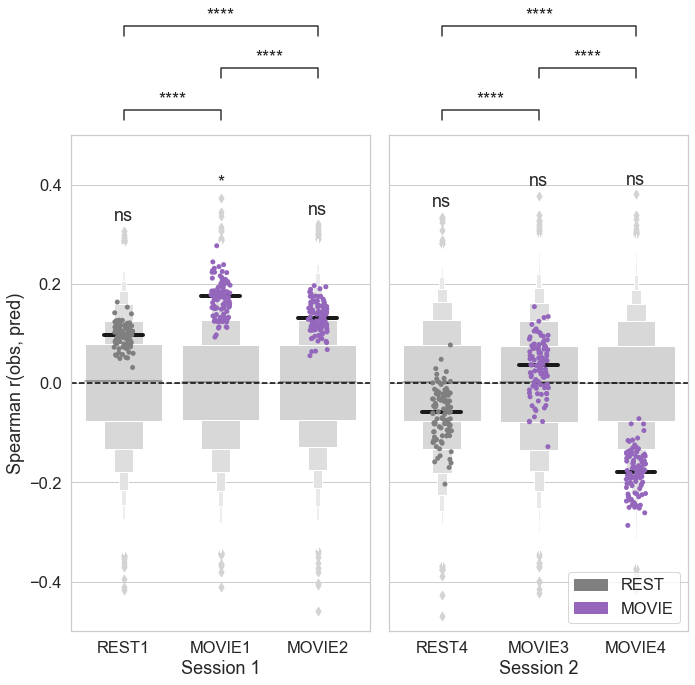

In [27]:
save_fig = False

params = {
    "metric": "spearman",
    "tail": "glm",
    "zscore": "0",
    "gsr": "1",
    "behav": "emotPC1"
}

add_stat_annot = True
p_val_method = 'median'
add_median_bar = True

filename = ''.join(["WholeRunResults_behav-", params["behav"], 
                                     "_gsr-", params["gsr"],
                                     "_zscore-", params["zscore"],
                                    "_metric-", params["metric"],
                                    "_tail-", params["tail"],
                    ".jpg"
                   ])

sns.set(font_scale=1.5, style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, sharex=False, sharey=True, figsize=(10,10))

# ---------------------------------------------------------------------------------------------------------------
# Do session 1
g1_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["session"] =="1")
                        ], 
                x="clip", order = ["REST1", "MOVIE1", "MOVIE2"],
                y="r_val", 
                color="lightgray",
                ax=ax1
               )

g1_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["session"] =="1")
                        ], 
            x="clip", order = ["REST1", "MOVIE1", "MOVIE2"],
            y="r_val", 
            ax=ax1,
            palette=my_palette,
               )

# ---------------------------------------------------------------------------------------------------------------
# Do session 2
g2_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["session"] =="2")
                        ], 
                x="clip", order = ["REST4", "MOVIE3", "MOVIE4"],
                y="r_val", 
                color="lightgray",
                ax=ax2
               )

g2_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["session"] =="2")
                        ], 
            x="clip", order = ["REST4", "MOVIE3", "MOVIE4"],
            y="r_val", 
            ax=ax2,
            palette=my_palette,
               )

ax1.set_ylim(-0.5, 0.5)
ax2.set_ylim(-0.5, 0.5)

# ---------------------------------------------------------------------------------------------------------------
if add_stat_annot is True:
    
    for ax in [ax1, ax2]:
        
        # Add p-values for individual runs vs their null distributions
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()

            obs = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)
               ]["r_val"]

            # calculate p-value and write it above
            perm =  df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==True)
                    & (df["clip"] ==clip)
                    ]["r_val"]
            
            if p_val_method =='median':
                p = ((perm > obs.median()).sum()+1)/(len(perm)+1)
                # annot = ''.join(["p=" + "{:.1g}".format(p_val)])
            elif p_val_method =='mw':
                stat, p = calc_pval(df, params, clip)
            elif p_val_method =='ttest':
                stat, p = sp.stats.ttest_ind(obs,perm)
                if stat < 0:
                    p = 1
            
            if 5.00e-02 < p <= 1.00e+00:
                annot = 'ns' 
            elif 1.00e-02 < p <= 5.00e-02:
                annot = '*'
            elif 1.00e-03 < p <= 1.00e-02:
                annot = '**'
            elif 1.00e-04 < p <= 1.00e-03:
                annot = '***'
            elif p <= 1.00e-04:
                annot = '****'
                
            max_val = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
               ].r_val.max()

            ax.annotate(annot, xy=(tick, max_val+0.02), ha='center')
            print(clip, ": {} rand, {} obs".format(len(perm), len(obs)))
            print("Median r = {:.2f}, p = {:.2g}".format(np.median(obs), p))
            
# Add p-values for comparing two runs
ax = ax1
order = ["REST1", "MOVIE1", "MOVIE2"]
box_pairs = [("MOVIE1", "REST1"), ("MOVIE2", "REST1"), ("MOVIE2", "MOVIE1")]
test_short_name = 't-test'
pvalues = []
for pair in box_pairs:
    data1 = df[(df["clip"]==pair[0])
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)]["r_val"]
    data2 = df[(df["clip"]==pair[1])
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)]["r_val"]
    if data1.median() > data2.median(): # need to make sure the so that higher U means more significant (to get f [effect size measure])
        u, p = sp.stats.mannwhitneyu(data1,data2, alternative='two-sided')
    elif data2.median() > data1.median():
        u, p = sp.stats.mannwhitneyu(data2,data1, alternative='two-sided')
    f = u/(len(data1)*len(data2))
    print("Performing Mann-Whitney U test on pair:",
          pair, "u={:.2f} f={:.2f} p-value={:.1g}".format(u, f, p))
    pvalues.append(p)
    
test_results = add_stat_annotation(ax, data=df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)], 
                            x = "clip", y= "r_val",
                              order=order,
                              box_pairs=box_pairs,
                              perform_stat_test=False, pvalues=pvalues,
                              test_short_name=test_short_name,
                              text_format='star', loc='outside',
                              )

# Add p-values for comparing two runs
ax = ax2
order = ["REST4", "MOVIE3", "MOVIE4"]
box_pairs = [("MOVIE3", "REST4"), ("MOVIE4", "REST4"), ("MOVIE3", "MOVIE4")]
test_short_name = 't-test'
pvalues = []
for pair in box_pairs:
    data1 = df[(df["clip"]==pair[0])
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)]["r_val"]
    data2 = df[(df["clip"]==pair[1])
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)]["r_val"]
    if data1.median() > data2.median(): # need to make sure the so that higher U means more significant (to get f [effect size measure])
        u, p = sp.stats.mannwhitneyu(data1,data2, alternative='two-sided')
    elif data2.median() > data1.median():
        u, p = sp.stats.mannwhitneyu(data2,data1, alternative='two-sided')
    f = u/(len(data1)*len(data2))
    print("Performing Mann-Whitney U test on pair:",
          pair, "u={:.2f} f={:.2f} p-value={:.1g}".format(u, f, p))
    pvalues.append(p)
    
test_results = add_stat_annotation(ax, data=df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)], 
                            x = "clip", y= "r_val",
                              order=order,
                              box_pairs=box_pairs,
                              perform_stat_test=False, pvalues=pvalues,
                              test_short_name=test_short_name,
                              text_format='star', loc='outside',
                              )
# ---------------------------------------------------------------------------------------------------------------
median_width = 0.4

if add_median_bar is True:
    for ax in [ax1, ax2]:
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()  # "X" or "Y"
            
            # calculate the median value for all replicates of either X or Y
            median_val = df[(df["clip"]==clip)
                            & (df["metric"]==params["metric"])
                                & (df["tail"]==params["tail"])
                                & (df["zscore"]==params["zscore"])
                                & (df["gsr"]==params["gsr"]) 
                                & (df["behav"] ==params["behav"])
                                & (df["RAND"] ==False)
                           ].r_val.median()

            # plot horizontal lines across the column, centered on the tick
            ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                    lw=4, color='k')

# ---------------------------------------------------------------------------------------------------------------            
for ax in [ax1, ax2]:
    ax.axhline(y=0, ls='--', c='black')
#    [t.set_color(i) for (i,t) in zip(['tab:gray','tab:blue','tab:blue'],ax.xaxis.get_ticklabels())]

ax1.set_xlabel("Session 1")
ax2.set_xlabel("Session 2")
ax1.set_ylabel(params["metric"].capitalize() + " r(obs, pred)")
ax2.yaxis.label.set_visible(False)

import matplotlib.patches as mpatches

rest_patch = mpatches.Patch(color='tab:gray', label='REST')
movie_patch = mpatches.Patch(color='tab:purple', label='MOVIE')

ax2.legend(handles=[rest_patch, movie_patch], loc='lower right')

fig.tight_layout()
if save_fig:
    plt.savefig(filename, dpi=300)

## Plot single-clip results

In [11]:
behav_list = ["cognPC1", "emotPC1"]

clip_list = ["twomen", "bridgeville", "pockets", "overcome", "testretest1",
              "inception", "socialnet", "oceans", "testretest2",
              "flower", "hotel", "garden", "dreary", "testretest3",
              "homealone", "brokovich", "starwars", "testretest4"  
            ]

# Clips with > 143 TRs
clip_list = ["twomen", "bridgeville", "pockets",
              "inception", "socialnet", "oceans",
              "flower", "hotel", "garden", "dreary",
              "homealone", "brokovich", "starwars",
            ]

all_files = os.listdir(data_dir)
files = []
for file in all_files:
    # if any(behav in file for behav in behav_list) and any(clip in file for clip in clip_list) and 'trs' not in file:
    if any(behav in file for behav in behav_list) and any(clip in file for clip in clip_list) and 'trs-143' in file:
        files.append(file)
        
        
print(len(files))
print(len(all_files))

1872
10081


In [12]:
attributes = ["clip", "behav", "gsr", "zscore", "tail", "metric"]

data = []

for f,file in enumerate(files):
    print("doing file {} of {}".format(f, len(files)))
    r_vals = np.loadtxt(data_dir+file)
    
    meta_data = []
    for attribute in attributes:
        this_attribute = file.split(attribute + '-')[1].split('_')[0].split('.')[0]
        meta_data.append(np.tile(this_attribute, len(r_vals)))
    
    if 'RAND' in file:
        meta_data.append(np.tile(True, len(r_vals)))
    if 'RAND' not in file:
        meta_data.append(np.tile(False, len(r_vals)))
    
    # Do session stuff
    if any(clip in file for clip in ["twomen", "bridgeville", "pockets", "overcome", "testretest1"]):
        meta_data.append(np.tile("1", len(r_vals)))
    if any(clip in file for clip in ["inception", "socialnet", "oceans", "testretest2"]):
        meta_data.append(np.tile("2", len(r_vals)))
    if any(clip in file for clip in ["flower", "hotel", "garden", "dreary", "testretest3"]):
        meta_data.append(np.tile("3", len(r_vals)))
    if any(clip in file for clip in ["homealone", "brokovich", "starwars", "testretest4"]):
        meta_data.append(np.tile("4", len(r_vals)))
    
    meta_data.append(r_vals)
    data.append(list(zip(*meta_data)))

data = [item for sublist in data for item in sublist]
columns = attributes + ['RAND', "run", "r_val"]
df = pd.DataFrame(data=data, columns=columns)

doing file 0 of 1872
doing file 1 of 1872
doing file 2 of 1872
doing file 3 of 1872
doing file 4 of 1872
doing file 5 of 1872
doing file 6 of 1872
doing file 7 of 1872
doing file 8 of 1872
doing file 9 of 1872
doing file 10 of 1872
doing file 11 of 1872
doing file 12 of 1872
doing file 13 of 1872
doing file 14 of 1872
doing file 15 of 1872
doing file 16 of 1872
doing file 17 of 1872
doing file 18 of 1872
doing file 19 of 1872
doing file 20 of 1872
doing file 21 of 1872
doing file 22 of 1872
doing file 23 of 1872
doing file 24 of 1872
doing file 25 of 1872
doing file 26 of 1872
doing file 27 of 1872
doing file 28 of 1872
doing file 29 of 1872
doing file 30 of 1872
doing file 31 of 1872
doing file 32 of 1872
doing file 33 of 1872
doing file 34 of 1872
doing file 35 of 1872
doing file 36 of 1872
doing file 37 of 1872
doing file 38 of 1872
doing file 39 of 1872
doing file 40 of 1872
doing file 41 of 1872
doing file 42 of 1872
doing file 43 of 1872
doing file 44 of 1872
doing file 45 of 187

doing file 363 of 1872
doing file 364 of 1872
doing file 365 of 1872
doing file 366 of 1872
doing file 367 of 1872
doing file 368 of 1872
doing file 369 of 1872
doing file 370 of 1872
doing file 371 of 1872
doing file 372 of 1872
doing file 373 of 1872
doing file 374 of 1872
doing file 375 of 1872
doing file 376 of 1872
doing file 377 of 1872
doing file 378 of 1872
doing file 379 of 1872
doing file 380 of 1872
doing file 381 of 1872
doing file 382 of 1872
doing file 383 of 1872
doing file 384 of 1872
doing file 385 of 1872
doing file 386 of 1872
doing file 387 of 1872
doing file 388 of 1872
doing file 389 of 1872
doing file 390 of 1872
doing file 391 of 1872
doing file 392 of 1872
doing file 393 of 1872
doing file 394 of 1872
doing file 395 of 1872
doing file 396 of 1872
doing file 397 of 1872
doing file 398 of 1872
doing file 399 of 1872
doing file 400 of 1872
doing file 401 of 1872
doing file 402 of 1872
doing file 403 of 1872
doing file 404 of 1872
doing file 405 of 1872
doing file 

doing file 721 of 1872
doing file 722 of 1872
doing file 723 of 1872
doing file 724 of 1872
doing file 725 of 1872
doing file 726 of 1872
doing file 727 of 1872
doing file 728 of 1872
doing file 729 of 1872
doing file 730 of 1872
doing file 731 of 1872
doing file 732 of 1872
doing file 733 of 1872
doing file 734 of 1872
doing file 735 of 1872
doing file 736 of 1872
doing file 737 of 1872
doing file 738 of 1872
doing file 739 of 1872
doing file 740 of 1872
doing file 741 of 1872
doing file 742 of 1872
doing file 743 of 1872
doing file 744 of 1872
doing file 745 of 1872
doing file 746 of 1872
doing file 747 of 1872
doing file 748 of 1872
doing file 749 of 1872
doing file 750 of 1872
doing file 751 of 1872
doing file 752 of 1872
doing file 753 of 1872
doing file 754 of 1872
doing file 755 of 1872
doing file 756 of 1872
doing file 757 of 1872
doing file 758 of 1872
doing file 759 of 1872
doing file 760 of 1872
doing file 761 of 1872
doing file 762 of 1872
doing file 763 of 1872
doing file 

doing file 1074 of 1872
doing file 1075 of 1872
doing file 1076 of 1872
doing file 1077 of 1872
doing file 1078 of 1872
doing file 1079 of 1872
doing file 1080 of 1872
doing file 1081 of 1872
doing file 1082 of 1872
doing file 1083 of 1872
doing file 1084 of 1872
doing file 1085 of 1872
doing file 1086 of 1872
doing file 1087 of 1872
doing file 1088 of 1872
doing file 1089 of 1872
doing file 1090 of 1872
doing file 1091 of 1872
doing file 1092 of 1872
doing file 1093 of 1872
doing file 1094 of 1872
doing file 1095 of 1872
doing file 1096 of 1872
doing file 1097 of 1872
doing file 1098 of 1872
doing file 1099 of 1872
doing file 1100 of 1872
doing file 1101 of 1872
doing file 1102 of 1872
doing file 1103 of 1872
doing file 1104 of 1872
doing file 1105 of 1872
doing file 1106 of 1872
doing file 1107 of 1872
doing file 1108 of 1872
doing file 1109 of 1872
doing file 1110 of 1872
doing file 1111 of 1872
doing file 1112 of 1872
doing file 1113 of 1872
doing file 1114 of 1872
doing file 1115 

doing file 1417 of 1872
doing file 1418 of 1872
doing file 1419 of 1872
doing file 1420 of 1872
doing file 1421 of 1872
doing file 1422 of 1872
doing file 1423 of 1872
doing file 1424 of 1872
doing file 1425 of 1872
doing file 1426 of 1872
doing file 1427 of 1872
doing file 1428 of 1872
doing file 1429 of 1872
doing file 1430 of 1872
doing file 1431 of 1872
doing file 1432 of 1872
doing file 1433 of 1872
doing file 1434 of 1872
doing file 1435 of 1872
doing file 1436 of 1872
doing file 1437 of 1872
doing file 1438 of 1872
doing file 1439 of 1872
doing file 1440 of 1872
doing file 1441 of 1872
doing file 1442 of 1872
doing file 1443 of 1872
doing file 1444 of 1872
doing file 1445 of 1872
doing file 1446 of 1872
doing file 1447 of 1872
doing file 1448 of 1872
doing file 1449 of 1872
doing file 1450 of 1872
doing file 1451 of 1872
doing file 1452 of 1872
doing file 1453 of 1872
doing file 1454 of 1872
doing file 1455 of 1872
doing file 1456 of 1872
doing file 1457 of 1872
doing file 1458 

doing file 1759 of 1872
doing file 1760 of 1872
doing file 1761 of 1872
doing file 1762 of 1872
doing file 1763 of 1872
doing file 1764 of 1872
doing file 1765 of 1872
doing file 1766 of 1872
doing file 1767 of 1872
doing file 1768 of 1872
doing file 1769 of 1872
doing file 1770 of 1872
doing file 1771 of 1872
doing file 1772 of 1872
doing file 1773 of 1872
doing file 1774 of 1872
doing file 1775 of 1872
doing file 1776 of 1872
doing file 1777 of 1872
doing file 1778 of 1872
doing file 1779 of 1872
doing file 1780 of 1872
doing file 1781 of 1872
doing file 1782 of 1872
doing file 1783 of 1872
doing file 1784 of 1872
doing file 1785 of 1872
doing file 1786 of 1872
doing file 1787 of 1872
doing file 1788 of 1872
doing file 1789 of 1872
doing file 1790 of 1872
doing file 1791 of 1872
doing file 1792 of 1872
doing file 1793 of 1872
doing file 1794 of 1872
doing file 1795 of 1872
doing file 1796 of 1872
doing file 1797 of 1872
doing file 1798 of 1872
doing file 1799 of 1872
doing file 1800 

In [13]:
for col in df.columns:
    print(col, df[col].unique())

clip ['twomen' 'oceans' 'hotel' 'inception' 'brokovich' 'dreary' 'flower'
 'garden' 'socialnet' 'pockets' 'homealone' 'starwars' 'bridgeville']
behav ['cognPC1' 'emotPC1']
gsr ['0' '1']
zscore ['0' '1']
tail ['neg' 'glm' 'pos']
metric ['pearson' 'r2' 'spearman']
RAND [False  True]
run ['1' '2' '3' '4']
r_val [ 0.15457967  0.22101166  0.20669139 ... -0.14018455 -0.33355224
 -0.17226977]


In [14]:
rename_dict = {
    "twomen": "two men",
    "oceans": "ocean's 11",
    "socialnet": "social net",
    "homealone": "home alone",
    "starwars": "star wars"
}

df["clip"].replace(rename_dict, inplace=True)

two men : 10000 rand, 100 obs
Median r = 0.18, p = 0.047
bridgeville : 10000 rand, 100 obs
Median r = 0.12, p = 0.13
pockets : 10000 rand, 100 obs
Median r = 0.22, p = 0.017
inception : 10000 rand, 100 obs
Median r = 0.22, p = 0.015
social net : 10000 rand, 100 obs
Median r = 0.38, p = 0.0001
ocean's 11 : 10000 rand, 100 obs
Median r = 0.34, p = 0.0003
flower : 10000 rand, 100 obs
Median r = 0.05, p = 0.33
hotel : 10000 rand, 100 obs
Median r = 0.14, p = 0.093
garden : 10000 rand, 100 obs
Median r = 0.18, p = 0.04
dreary : 10000 rand, 100 obs
Median r = 0.04, p = 0.36
home alone : 10000 rand, 100 obs
Median r = 0.20, p = 0.028
brokovich : 10000 rand, 100 obs
Median r = 0.19, p = 0.037
star wars : 10000 rand, 100 obs
Median r = 0.21, p = 0.018


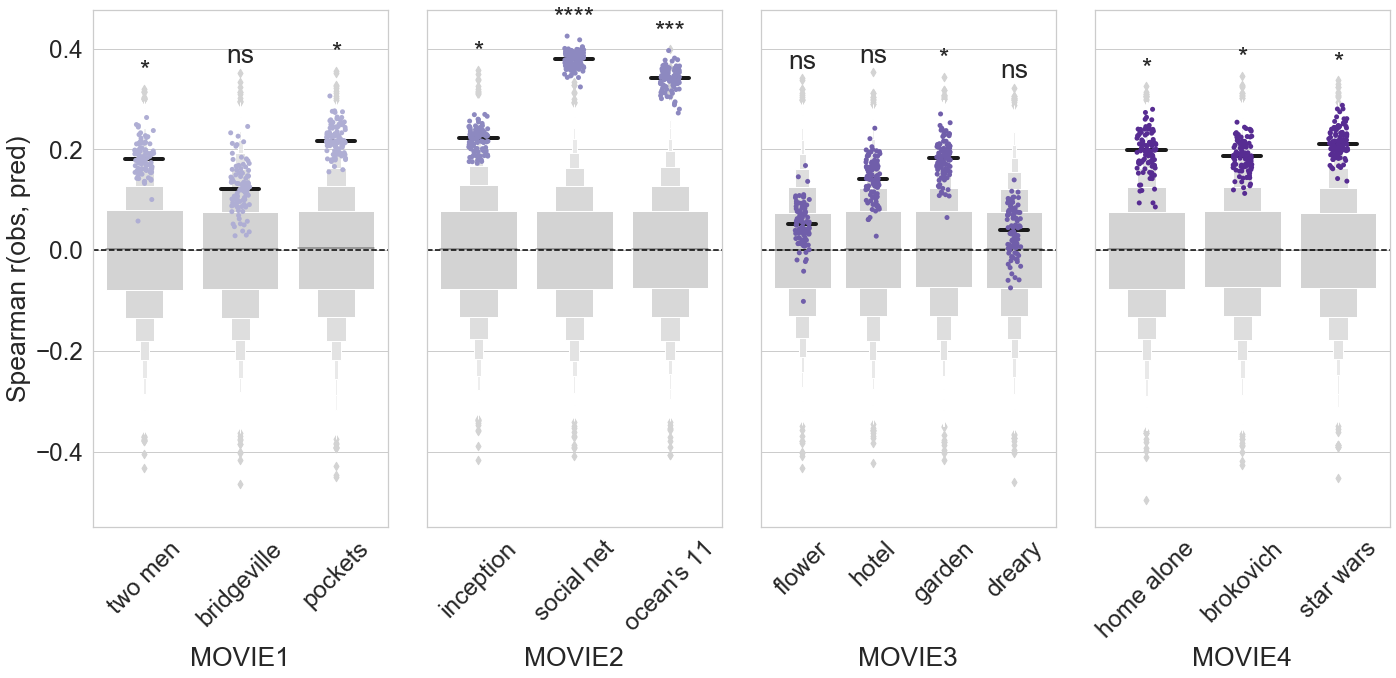

In [20]:
params = {
    "metric": "spearman",
    "tail": "glm",
    "zscore": "0",
    "gsr": "1",
    "behav": "cognPC1"
}

add_stat_annot = True
p_val_method = 'median'
add_median_bar = True

filename = ''.join(["SingleClipResults_behav-", params["behav"], 
                                     "_gsr-", params["gsr"],
                                     "_zscore-", params["zscore"],
                                    "_metric-", params["metric"],
                                    "_tail-", params["tail"],
                    ".jpg"
                   ])


sns.set(font_scale=2.2, style="whitegrid")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex=False, sharey=True, figsize=(20,10))
color_palette="Purples"

# Do Run 1
g1_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["run"] =="1")
                        ], 
                x="clip", order = ["two men", "bridgeville", "pockets", "overcome", "testretest1"],
                y="r_val", 
                color="lightgray",
                ax=ax1
               )

g1_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["run"] =="1")
                        ], 
            x="clip", order = ["two men", "bridgeville", "pockets"],
            y="r_val", 
            ax=ax1,
            color=sns.color_palette(color_palette)[2]               
            )

# Do Run 2
g2_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["run"] =="2")
                        ], 
                x="clip", order = ["inception", "social net", "ocean's 11"],
                y="r_val", 
                color="lightgray",
                ax=ax2
               )

g2_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["run"] =="2")
                        ], 
            x="clip", order = ["inception", "social net", "ocean's 11"],
            y="r_val", 
            ax=ax2,
            color=sns.color_palette(color_palette)[3]               
            )

# Do Run 3
g3_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["run"] =="3")
                        ], 
                x="clip", order = ["flower", "hotel", "garden", "dreary"],
                y="r_val", 
                color="lightgray",
                ax=ax3
               )

g3_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["run"] =="3")
                        ], 
            x="clip", order = ["flower", "hotel", "garden", "dreary"],
            y="r_val", 
            ax=ax3,
            color=sns.color_palette(color_palette)[4]               
            )

# Do Run 4
g4_rand = sns.boxenplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==True)
                        & (df["run"] =="4")
                        ], 
                x="clip", order = ["home alone", "brokovich", "star wars"],
                y="r_val", 
                color="lightgray",
                ax=ax4
               )

g4_obs = sns.stripplot(data=df[(df["metric"]==params["metric"])
                        & (df["tail"]==params["tail"])
                        & (df["zscore"]==params["zscore"])
                        & (df["gsr"]==params["gsr"]) 
                        & (df["behav"] ==params["behav"])
                        & (df["RAND"] ==False)
                        & (df["run"] =="4")
                        ], 
            x="clip", order = ["home alone", "brokovich", "star wars"],
            y="r_val", 
            ax=ax4,
            color=sns.color_palette(color_palette)[5]               
            )

# ---------------------------------------------------------------------------------------------------------------
median_width = 0.4

if add_median_bar is True:
    for ax in [ax1, ax2, ax3, ax4]:
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()  # "X" or "Y"
            
            # calculate the median value for all replicates of either X or Y
            median_val = df[(df["clip"]==clip)
                            & (df["metric"]==params["metric"])
                                & (df["tail"]==params["tail"])
                                & (df["zscore"]==params["zscore"])
                                & (df["gsr"]==params["gsr"]) 
                                & (df["behav"] ==params["behav"])
                                & (df["RAND"] ==False)
                           ].r_val.median()

            # plot horizontal lines across the column, centered on the tick
            ax.plot([tick-median_width/2, tick+median_width/2], [median_val, median_val],
                    lw=4, color='k')
# ------------------------------------------------------------------------------------------------------------

for ax in [ax1, ax2, ax3, ax4]:
    ax.axhline(y=0, ls='--', c='black')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    # ax.xaxis.label.set_visible(False)
    
# ax1.set_title("MOVIE1")
# ax2.set_title("MOVIE2")
# ax3.set_title("MOVIE3")
# ax4.set_title("MOVIE4")

ax1.set_xlabel("MOVIE1")
ax2.set_xlabel("MOVIE2")
ax3.set_xlabel("MOVIE3")
ax4.set_xlabel("MOVIE4")

ax1.set_ylabel(params["metric"].capitalize() + " r(obs, pred)")
for ax in [ax2, ax3, ax4]:
    ax.yaxis.label.set_visible(False)
    
# -----------------------------------------------------------------------------------------------------------
if add_stat_annot is True:
    
    for ax in [ax1, ax2, ax3, ax4]:
        
        # Add p-values for individual runs vs their null distributions
        for tick, text in zip(ax.get_xticks(), ax.get_xticklabels()):
            clip = text.get_text()

            obs = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)
               ]["r_val"]

            # calculate p-value and write it above
            perm =  df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==True)
                    & (df["clip"] ==clip)
                    ]["r_val"]
            
            if p_val_method =='median':
                p = ((perm > obs.median()).sum()+1)/(len(perm)+1)
                # annot = ''.join(["p=" + "{:.1g}".format(p_val)])
            elif p_val_method =='mw':
                stat, p = calc_pval(df, params, clip)
            elif p_val_method =='ttest':
                stat, p = sp.stats.ttest_ind(obs,perm)
                if stat < 0:
                    p = 1
            
            if 5.00e-02 < p <= 1.00e+00:
                annot = 'ns' 
            elif 1.00e-02 < p <= 5.00e-02:
                annot = '*'
            elif 1.00e-03 < p <= 1.00e-02:
                annot = '**'
            elif 1.00e-04 < p <= 1.00e-03:
                annot = '***'
            elif p <= 1.00e-04:
                annot = '****'
                
            max_val = df[(df["clip"]==clip)
                & (df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
               ].r_val.max()

            ax.annotate(annot, xy=(tick, max_val+0.02), ha='center')
            print(clip, ": {} rand, {} obs".format(len(perm), len(obs)))
            print("Median r = {:.2f}, p = {:.2g}".format(np.median(obs), p))
            
fig.align_xlabels()
fig.tight_layout()
plt.savefig(filename, dpi=300)

## Compare EMOT and COGN predictions

In [34]:
plt.rcParams.update({'font.size': 40})

In [22]:
params = {
    "metric": "spearman",
    "tail": "glm",
    "zscore": "0",
    "gsr": "1",
    "behav": "cognPC1"
}

cogn_median_val = df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)
               ].groupby("clip", sort=False).r_val.median()

cogn_median_val

clip
ocean's 11     0.342261
dreary         0.040545
garden         0.182495
hotel          0.141923
inception      0.222143
brokovich      0.187331
star wars      0.211377
two men        0.180369
pockets        0.216468
home alone     0.198027
social net     0.379092
bridgeville    0.120825
flower         0.051353
Name: r_val, dtype: float64

In [23]:
params["behav"]="emotPC1"

emot_median_val = df[(df["metric"]==params["metric"])
                    & (df["tail"]==params["tail"])
                    & (df["zscore"]==params["zscore"])
                    & (df["gsr"]==params["gsr"]) 
                    & (df["behav"] ==params["behav"])
                    & (df["RAND"] ==False)
               ].groupby("clip", sort=False).r_val.median()

emot_median_val

clip
pockets        0.223575
ocean's 11     0.220691
star wars     -0.073874
two men       -0.006423
dreary        -0.181328
garden        -0.020333
flower        -0.063442
inception      0.094674
bridgeville   -0.006565
brokovich      0.014734
social net     0.235419
home alone     0.038924
hotel         -0.011225
Name: r_val, dtype: float64

SpearmanrResult(correlation=0.8285714285714287, pvalue=0.04156268221574334)
(0.8257131392006977, 0.04291680378531096)


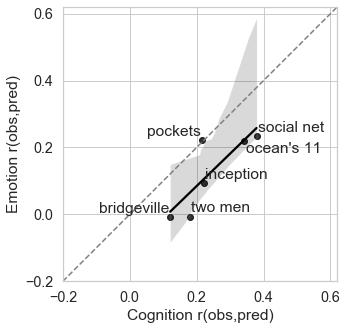

In [41]:
clips_of_interest = [
    "two men",
    "bridgeville",
    "pockets",
    "inception",
    "social net",
    "ocean's 11",
]

x = cogn_median_val[clips_of_interest]
y = emot_median_val[clips_of_interest]

fig, ax = plt.subplots(figsize=(5,5))
sns.set(font_scale=1.3, style='darkgrid')
sns.set_style("ticks")

with sns.axes_style("darkgrid"):
    # sns.scatterplot(x,y,ax=ax, color='black')
    sns.regplot(x, y, ax=ax, color='black')


ax.set_xlabel("Cognition r(obs,pred)")
ax.set_ylabel("Emotion r(obs,pred)")

labels = [ax.annotate(txt, (x[i], y[i])) for i,txt in enumerate(x.index)]

# Make everything square and draw identity line
set_aspect_ratio(ax)
draw_id_line(ax)
adjust_text(labels)

ax.set_yticks(ax.get_xticks()[:-1])
set_aspect_ratio(ax)

sns.set_style("whitegrid")
# sns.set_style("ticks")
print(sp.stats.spearmanr(x,y))
print(sp.stats.pearsonr(x,y))

fig.tight_layout()
plt.savefig('single_clip_cogn_vs_emotion_median_r.png', dpi=300)

In [25]:
cogn_median_val.reindex(clips_of_interest)

clip
twomen              NaN
bridgeville    0.120825
pockets        0.216468
inception      0.222143
socialnet           NaN
oceans              NaN
Name: r_val, dtype: float64